# Loading Wine Recognition Dataset

Firstly I will import datasets from sklearn.

In [1]:
from sklearn import datasets

Then from the sklearn datasets I will load the 'wine' dataset and get its full description.

In [2]:
wine_data = datasets.load_wine()
print(wine_data['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

# Visualize and Preprocess Data

I will now check the shapes of the 'data' and target' fields

In [3]:
X = wine_data['data']
y = wine_data['target']

print('data.shape\t',X.shape,
      '\ntarget.shape \t',y.shape)

data.shape	 (178, 13) 
target.shape 	 (178,)


With this it is confirmed that there are 178 samples (rows) and 13 feaures (columns)
I will now build a pandas DataFrame, to hold the data so that we can visualize the dataset into a tabular form.

In [4]:
import numpy as np
import pandas as pd

datawine = pd.DataFrame(data= np.c_[X,y],columns= wine_data['feature_names'] + ['target'])
datawine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2.0


With this DataFrame I can check for any missing values.

In [5]:
datawine.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

This confirms that there are no missing values and categorical data. The final step to data preprocessing is Feature Scaling. This is done by importing StandardScaler from sklearn.preprocessing

In [6]:
from sklearn.preprocessing import StandardScaler

st_x= StandardScaler()
X= st_x.fit_transform(X)

# Convert Numpy Arrays to Pytorch Tensors

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F

X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.int64)

# Split Data For Training & Testing

To train and test our model effectively, we must first separate the data into a training set, which we will feed to our model along with the training labels. The model will then be tested on the 'test' data after it has been trained to determine its real-world applicability.

The train test split() method in Scikit-learn comes in handy here. test size specifies how much data is set aside for testing. We want to train our model on enough data to make good predictions, but we also need enough test data to see if we've overfitted the model. Therefore I will choose to test with 20% of the data. This means 80% of data will used for training.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42 #I chose 42 for random_state as is the most common number used for random_state
)

N1 = y_train
N2 = y_test

print(len(N1),'\n',
      len(N2))

142 
 36


# Multilayer Perceptron Neural Network (MLP)

A multilayer perceptron (MLP) neural network is a type of artificial neural network (ANN) that consists of multiple layers of interconnected nodes or neurons. It is a feedforward neural network, meaning that information flows from the input layer through the hidden layers to the output layer without any feedback loops.

The nodes in an MLP are organized into layers, with each layer having a specific function. The first layer is the input layer, which receives the raw input data. The output of the input layer is then passed to the first hidden layer, where it undergoes a nonlinear transformation using an activation function. The output of the first hidden layer is then passed to the next hidden layer, and so on, until it reaches the output layer. The output layer produces the final output of the network, which can be a single value or a vector of values, depending on the task at hand. The MLP is trained using a supervised learning algorithm, such as backpropagation, which adjusts the weights and biases of the network to minimize the difference between the predicted output and the actual output.

One way to understand an MLP is to compare it to a logistic regression model. In logistic regression, we have a set of input features and a binary output, and we model the probability of the output being 1 given the input features. The logistic regression model has a single output node that applies a logistic function to the weighted sum of the input features.

# Setting Hyperparameters, And Train the Model

In [9]:
if torch.cuda.is_available():
    device = 'cuda'
else:
    device = 'cpu'

input_size = 13
num_classes = 3
num_epochs = 1000
batch_size = 13
learning_rate = 0.001

The input size is set to 13 which is the number of features in the dataset, and the number of classes is set to 3 as there are 3 classes in the dataset. I set the batch size to be the same as the input size, and the learning rate is set to 0.001 which is its default value. I set the number of epochs to 1000.

In [10]:
class LogisticRegression(nn.Module):
    def __init__(self, input_size, num_classes):
        super(LogisticRegression, self).__init__()
        self.hidden1 = nn.Linear(input_size, 15)
        self.linear = nn.Linear(15, num_classes)

    def forward(self, x):
        x = self.hidden1(x)
        x = F.relu(x)
        x = self.linear(x)
        return x

# Create an instance of the model and move it to the device
model = LogisticRegression(input_size, num_classes).to(device)
model.train()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
for epoch in range(num_epochs):
    # Shuffle the training data
    perm = torch.randperm(len(y_train))
    X_train_shuffled = X_train[perm]
    y_train_shuffled = y_train[perm]

    # Loop over batches of data
    for i in range(0, len(y_train), batch_size):
        # Get the batch of data
        xb = X_train_shuffled[i:i+batch_size].to(device)
        labels = y_train_shuffled[i:i+batch_size].to(device)

        # Forward pass
        outputs = model(xb)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

       # Print the loss
        if (epoch + 1) % 100 == 0 and (i // batch_size) % 10 == 0:
            print(f'Epoch {epoch+1}/{num_epochs} Loss: {loss.item():.4f}')

Epoch 100/1000 Loss: 0.0358
Epoch 100/1000 Loss: 0.0157
Epoch 200/1000 Loss: 0.0009
Epoch 200/1000 Loss: 0.0018
Epoch 300/1000 Loss: 0.0015
Epoch 300/1000 Loss: 0.0006
Epoch 400/1000 Loss: 0.0011
Epoch 400/1000 Loss: 0.0005
Epoch 500/1000 Loss: 0.0002
Epoch 500/1000 Loss: 0.0000
Epoch 600/1000 Loss: 0.0002
Epoch 600/1000 Loss: 0.0002
Epoch 700/1000 Loss: 0.0000
Epoch 700/1000 Loss: 0.0001
Epoch 800/1000 Loss: 0.0001
Epoch 800/1000 Loss: 0.0000
Epoch 900/1000 Loss: 0.0000
Epoch 900/1000 Loss: 0.0000
Epoch 1000/1000 Loss: 0.0000
Epoch 1000/1000 Loss: 0.0000


First, the LogisticRegression class is defined. It inherits from nn.Module, which is a base class for all neural network modules in PyTorch. It has two layers: a hidden layer with 15 neurons and a linear output layer that maps the 15 hidden units to the number of classes. The forward method defines the forward pass through the network: first, the input is passed through the hidden layer and a ReLU activation function is applied, then the output is passed through the linear layer.

Next, an instance of the LogisticRegression model is created and moved to the device. The model is set to training mode using model.train().

The loss function is defined as the cross-entropy loss, which is commonly used for classification problems. The optimizer used is Adam, which is a variant of stochastic gradient descent that adapts the learning rate for each parameter based on the first and second moments of the gradients.

The model is trained using a loop over the specified number of epochs. In each epoch, the training data is shuffled and split into batches of the specified size. For each batch, the forward pass is performed to obtain the model's output, the loss is calculated using the cross-entropy loss function, and the optimizer is used to update the model's parameters via backpropagation.

The loss is printed periodically, every 100 epochs, and every 10 batches within each epoch. The loss.item() method extracts the scalar value of the loss tensor.

As shown above, as the number of epochs increase, the amount of loss gradually decreases till 0.0000. The model has correctly predicted the target output for each training example.

# Saving the weights

In [11]:
torch.save(model.state_dict(), 'model_class_weights.ckpt')

In PyTorch, a model's state dictionary is a Python dictionary object that contains all of the learnable parameters of the model and their current values. This includes things like the weights and biases of the model's layers.

The torch.save() function is a utility provided by PyTorch for saving various objects to disk. In this case, it is being used to save the model's state dictionary.

The first argument to torch.save() is the object to be saved, which in this case is model.state_dict(). The second argument is the path where the saved file should be stored, which is "model_class_weights.ckpt" in this case. The ".ckpt" extension is commonly used to indicate checkpoint files that save the state of a model at a particular point during training.

# Model Evaluation

In [12]:
model.eval()
with torch.no_grad():
    outputs = model(X_test.to(device))
    _, predicted = torch.max(outputs, 1)
    y_pred = predicted.cpu().numpy()

This code sets the model into evaluation mode and uses it to predict class labels for a test dataset X_test. The torch.no_grad() context manager is used to disable gradient computations, which reduces memory usage and speeds up inference. The predicted class labels are obtained using the maximum value along the predicted probabilities axis and converted to a numpy array on the CPU.

# Performance of Neural Network with Classification metrics

In [13]:
from sklearn import metrics

acc = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc:.4f}')
print("\n")
recall = metrics.recall_score(y_test, y_pred, average=None)
print("NN recall: ",  recall )
print("\n")
prec = metrics.precision_score(y_test, y_pred, average=None)
print("NN precision:", prec )
print("\n")
f1 = metrics.f1_score(y_test, y_pred, average=None)
print("NN f1:", f1 )
print("\n")
conf_mat = metrics.confusion_matrix(y_test, y_pred)
print("NN conf_mat: ")
print(conf_mat)
print("\n")
print("NN Classification Report:\n", metrics.classification_report(y_test, y_pred, digits=4))

Accuracy: 1.0000


NN recall:  [1. 1. 1.]


NN precision: [1. 1. 1.]


NN f1: [1. 1. 1.]


NN conf_mat: 
[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]


NN Classification Report:
               precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        14
           1     1.0000    1.0000    1.0000        14
           2     1.0000    1.0000    1.0000         8

    accuracy                         1.0000        36
   macro avg     1.0000    1.0000    1.0000        36
weighted avg     1.0000    1.0000    1.0000        36



As shown from the classification report, the accuracy of the Neural Network is 100% which is absolute accuracy. The recall, precision and F1 scores are also 100% which is absolute in all classes. This means that the model performed really well, and was able to correctly classify the different wines.

# Conclusion

A Logistic Regression model was created with Pytorch and using the cross-entropy loss and Adam optimizer it was trained. The amount of loss decreased to 0 in the 1000th epoch. Then the model was evaluated on the test subset, and the accuracy that the Nueural Network achieved was 100%, which is absolute accuracy. The recall, precision and F1 scores also showed 100% accuracy in three classes.

Comparing to the first assignment, this model performs equally to the Random Forest Classifier, and peforms better than the other three classifiers (Decision Tree, SVM, K-Nearest Neighbors).

In conclusion, it can be safe to mention that this is model is one of the best classification model, however choosing a model for classifcation totally depends on the type of dataset, and the chosen parameters as these factors will affect the performance of a model. This model can be improved by adding more hidden layers, using different activation functions as well as different optimizers.

# Appendix

# # Check for Overfitting

In order to ensure that there was no overfitting, in a separate python file, with the same code, I included training accuracy to compare with testing accuracy, and also included a code for plotting Training Loss and Validation Loss.

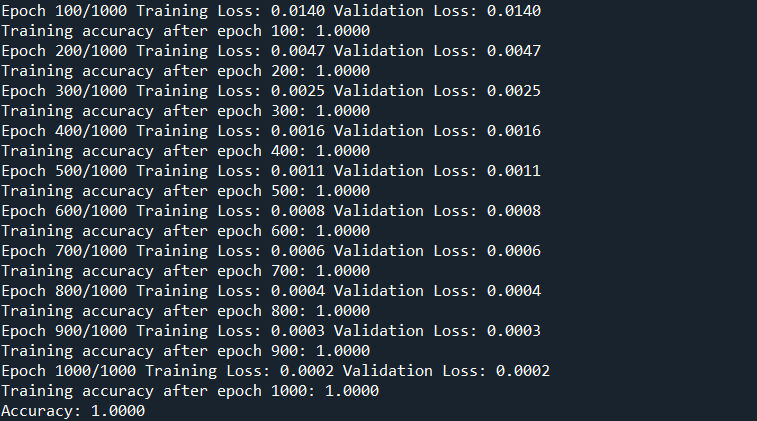

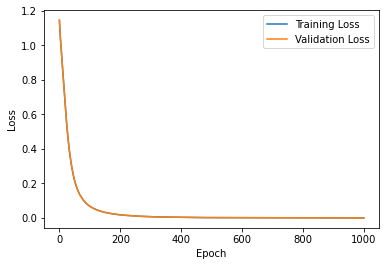

As shown from the above screenshots it can be seen that there were no overfitting. When the training accuracy is equal to the testing accuracy, and when the training loss is equal to the validation loss, it means that the machine learning model is performing equally well on both the training dataset and the testing dataset. It indicates that the model is not overfitting to the training data and can generalize well to new, unseen data.

# # Using Sigmoid Activation Function

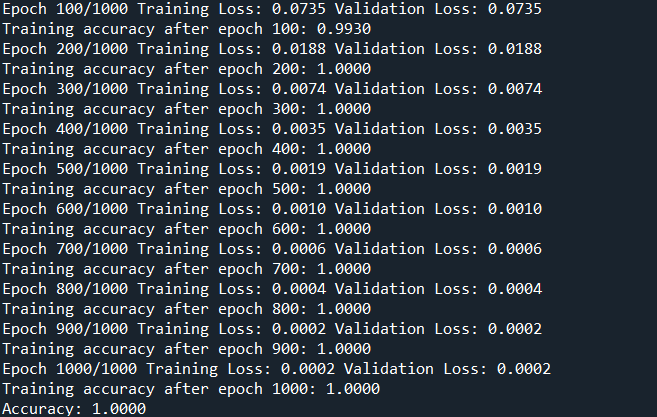

When using a sigmoid activation function in the hidden layer with the same parameters used with ReLU, it can be seen the loss at the beginning epochs are a bit higher than for ReLU. However, it still gives 100% accuracy.

# # Increasing number of hidden layers (30)

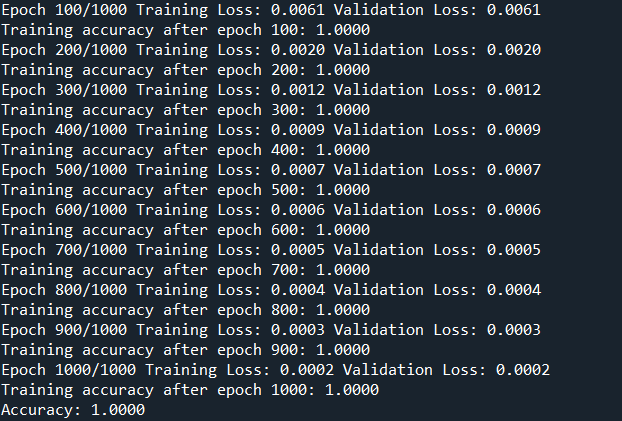

When doubling the hidden layer size from 15 to 30, the amount of loss is comparatively less compared to when the size was 15. So in this case it may be better to use a slightly higher number of hidden layers.

# # Without using Feature Scaling

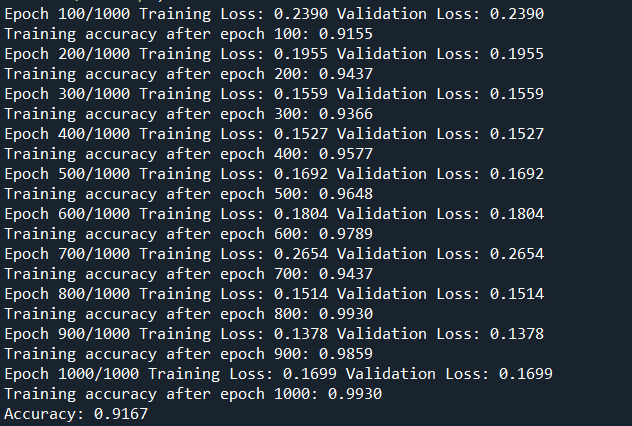

Without using feature scaling, the amount of loss is significantly higher and the accuracy is not good enough. When feature scaling is not used, the input features may have different ranges or units, which can affect the performance and convergence of machine learning algorithms. It is always better to do feature scaling as a part of data preprocessing.